## Appendix: BART joint distribution

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'

url = "http://64.111.127.166/origin-destination/date-hour-soo-dest-2017.csv.gz"

df = pd.read_csv(url, 
                 names=["date", "hod", "orig", "dest", "ct"])
df["date"] = pd.to_datetime(df["date"])
df["doy"] = df["date"].dt.dayofyear

In [4]:
# get totals for day of year/hour of day groups
hourcounts = df.groupby(["doy", "hod"]).ct.sum().reset_index()

Text(0.5, 1.0, 'Joint distribution of trips across days of the week')

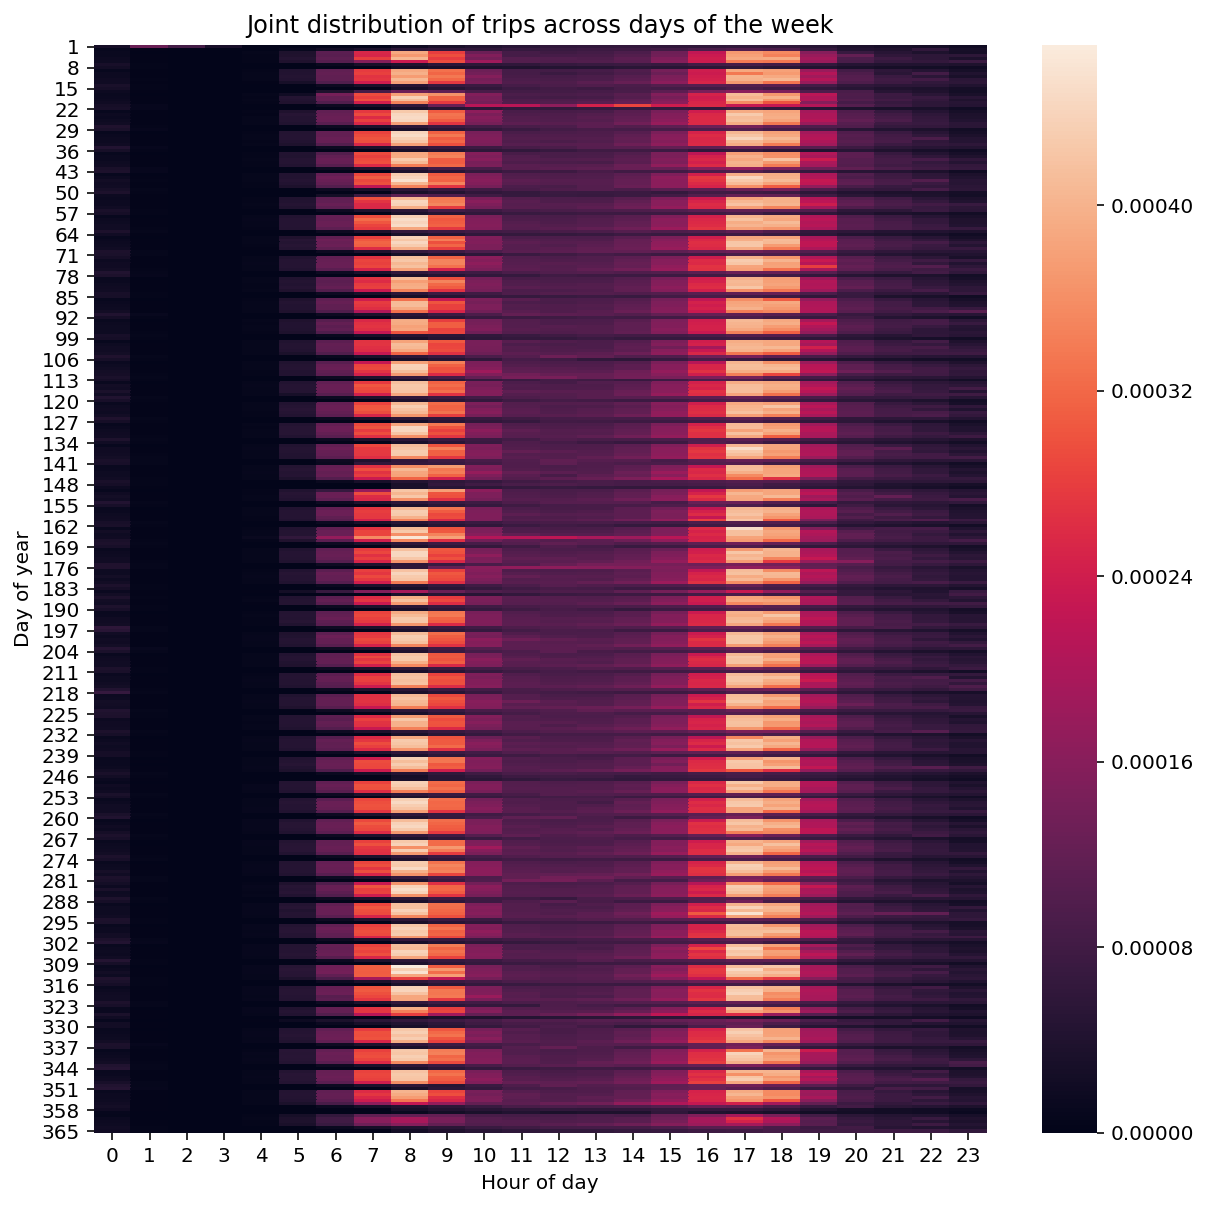

In [5]:
# make pivot table, then normalize to get a joint distribution

pt = pd.pivot_table(hourcounts, values="ct", index="doy", columns="hod", fill_value=0)

plt.figure(figsize=(10,10))
ax = sns.heatmap( pt/(pt.sum().sum()) )
ax.set_xlabel("Hour of day")
ax.set_ylabel("Day of year")
ax.set_title("Joint distribution of trips across days of the week")

Text(0.5, 1.0, 'Marginal distribution of BART trips by hour ouf day')

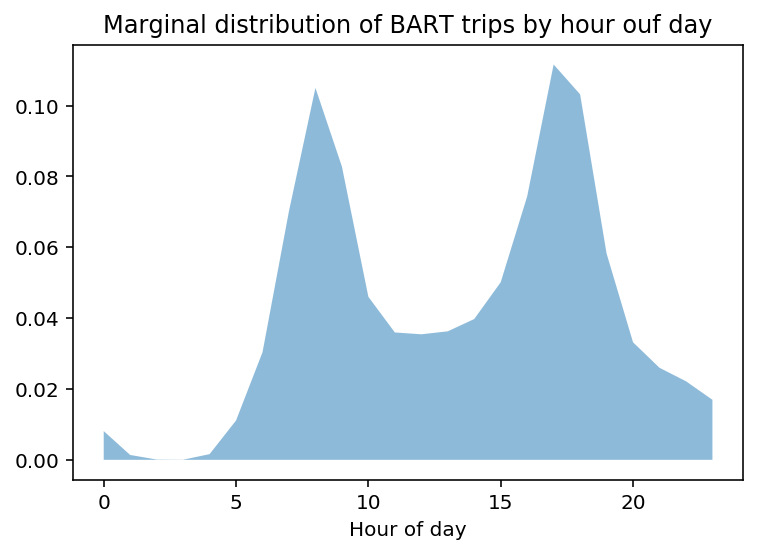

In [6]:
hod_dist = pt.sum()/pt.sum().sum()
plt.fill_between( hod_dist.index, 0, hod_dist, alpha=0.5 )
plt.xlabel("Hour of day")
plt.title("Marginal distribution of BART trips by hour ouf day")

Text(0.5, 1.0, 'Marginal distribution of BART trips by day of year')

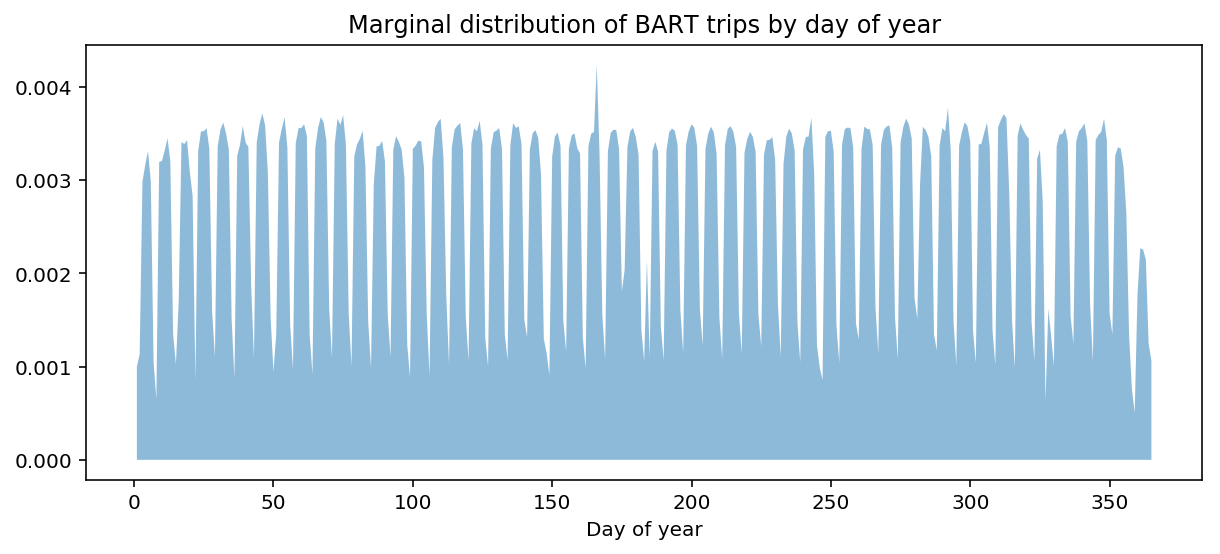

In [7]:
plt.figure(figsize=(10,4))
doy_dist = pt.T.sum()/pt.sum().sum()
plt.fill_between( doy_dist.index, 0, doy_dist, alpha=0.5 )
plt.xlabel("Day of year")
plt.title("Marginal distribution of BART trips by day of year")